<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/8_2_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train_shape (60000, 28, 28)
y_train_shape (60000,)
x_test_shape (10000, 28, 28)
y_test_shape (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8837 - loss: 0.4117
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9738 - loss: 0.0866
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9838 - loss: 0.0514
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9895 - loss: 0.0345
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9918 - loss: 0.0267
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9774 - loss: 0.0843
Test score(loss): 0.06857988238334656
Test accuracy(accuracy): 0.9811999797821045
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

predicted_classes length =  10000 
predicted_classes= [7 2 1 ... 4 5 6]

correct_indices length =  9812 
correct_indices= [   0    1    2 ... 9997 9998 9999]

incorrect_indices length =  188 
icorrect_indices= [   8  104  151  241  247  274  321  340  445  449  582  583  674  691
  720  882  900  947  951  956 1014 1039 1050 1156 1181 1182 1226 1232
 1242 1247 1260 13

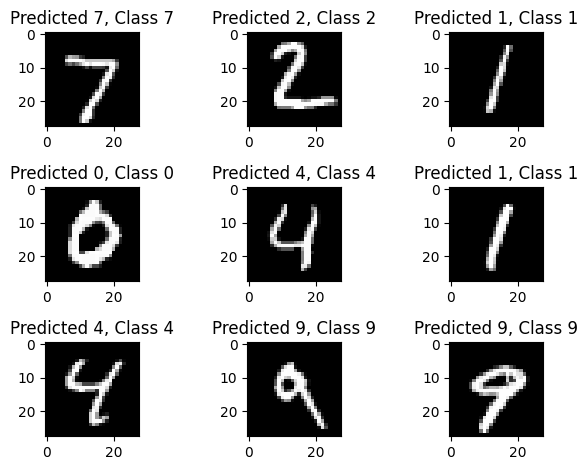

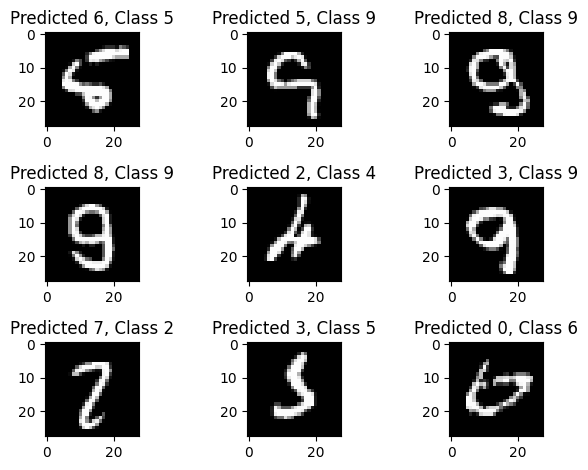

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train_shape', x_train.shape)
print('y_train_shape', y_train.shape)
print('x_test_shape', x_test.shape)
print('y_test_shape', y_test.shape)

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

"""
to_categorical: Keras의 유틸리티 함수로, 정수 레이블을 원-핫 인코딩 형태로 변환합니다.
원-핫 인코딩은 각 클래스를 이진 벡터로 표현하는 방법입니다.
예를 들어, 클래스 0은 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 클래스 1은 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]와 같이 표현됩니다.
"""
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1) #epochs 값을 1부터 증가하면서 보면 Incorrect_indices가 줄어드는 것을 알수있음

score = model.evaluate(X_test, Y_test)
print('Test score(loss):', score[0])
print('Test accuracy(accuracy):', score[1])


predicted_classes = np.argmax(model.predict(X_test), axis=1) # axis=1 일때는 각 행(샘플)에 대해 가장 높은 확률을 가진 클래스 인덱스를 찾습니다.
print("\npredicted_classes length = ", len(predicted_classes), "\npredicted_classes=", predicted_classes)

"""
- predicted_classes == y_test는 두 배열을 비교하여 요소별로 True 또는 False를 반환합니다.
  True는 예측이 실제 값과 일치할 때 나타납니다.
- np.nonzero(...)는 배열에서 True인 요소의 인덱스를 반환합니다.
- [0]는 이 결과에서 첫 번째 차원에 해당하는 인덱스 값들만 선택합니다
"""
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print("\ncorrect_indices length = ", len(correct_indices), "\ncorrect_indices=", correct_indices)

"""
1. np.nonzero() --> True인 위치(= 틀린 예측)의 인덱스를 반환합니다.
   다만, 항상 튜플로 반환됩니다!
   예) np.nonzero([False, True, False, True]) --> 결과: (array([1, 3]),)
2. [0]의 의미
   위 결과는 튜플 (array([1, 3]),)입니다.
   여기서 array([1, 3])만 꺼내려면 [0]이 필요합니다.
"""
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("\nincorrect_indices length = ", len(incorrect_indices), "\nicorrect_indices=", incorrect_indices)

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()



In [ ]:
import numpy as np

predicted_classes = np.array([1, 2, 1, 0, 2])
y_test = np.array([1, 0, 1, 0, 1])

# 예측과 실제 값이 일치하는 인덱스 찾기
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print(correct_indices)


[0 2 3]
